In [10]:
from IPython.core.events import EventManager
from datetime import datetime

def print_time(info):
    print(f"[Executed on {datetime.now()}]")

get_ipython().events.register('pre_run_cell', print_time)


In [2]:
import scanpy as sc

[Executed on 2023-09-05 15:20:10.895678]


In [3]:
adata=sc.read_h5ad('/proj/sensoryaging/data/data/up_dated_data/SGNs/all_unknown_remove_PCP4.h5ad')
adata

[Executed on 2023-09-05 15:20:17.865012]


AnnData object with n_obs × n_vars = 868 × 33241
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_sub'
    var: 'mean', 'std'
    uns: 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap', 'X_umapOriginal'
    layers: 'Scale', 'log1p', 'umi'
    obsp: 'connectivities', 'distances'

[Executed on 2023-09-05 15:20:20.893463]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


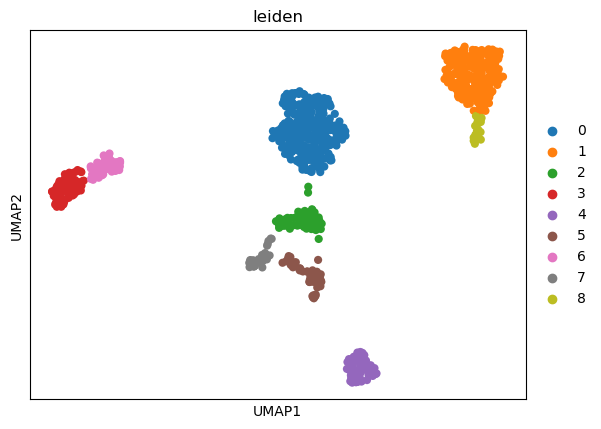

In [4]:
sc.pl.umap(adata,color='leiden')

[Executed on 2023-09-05 15:20:22.698821]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


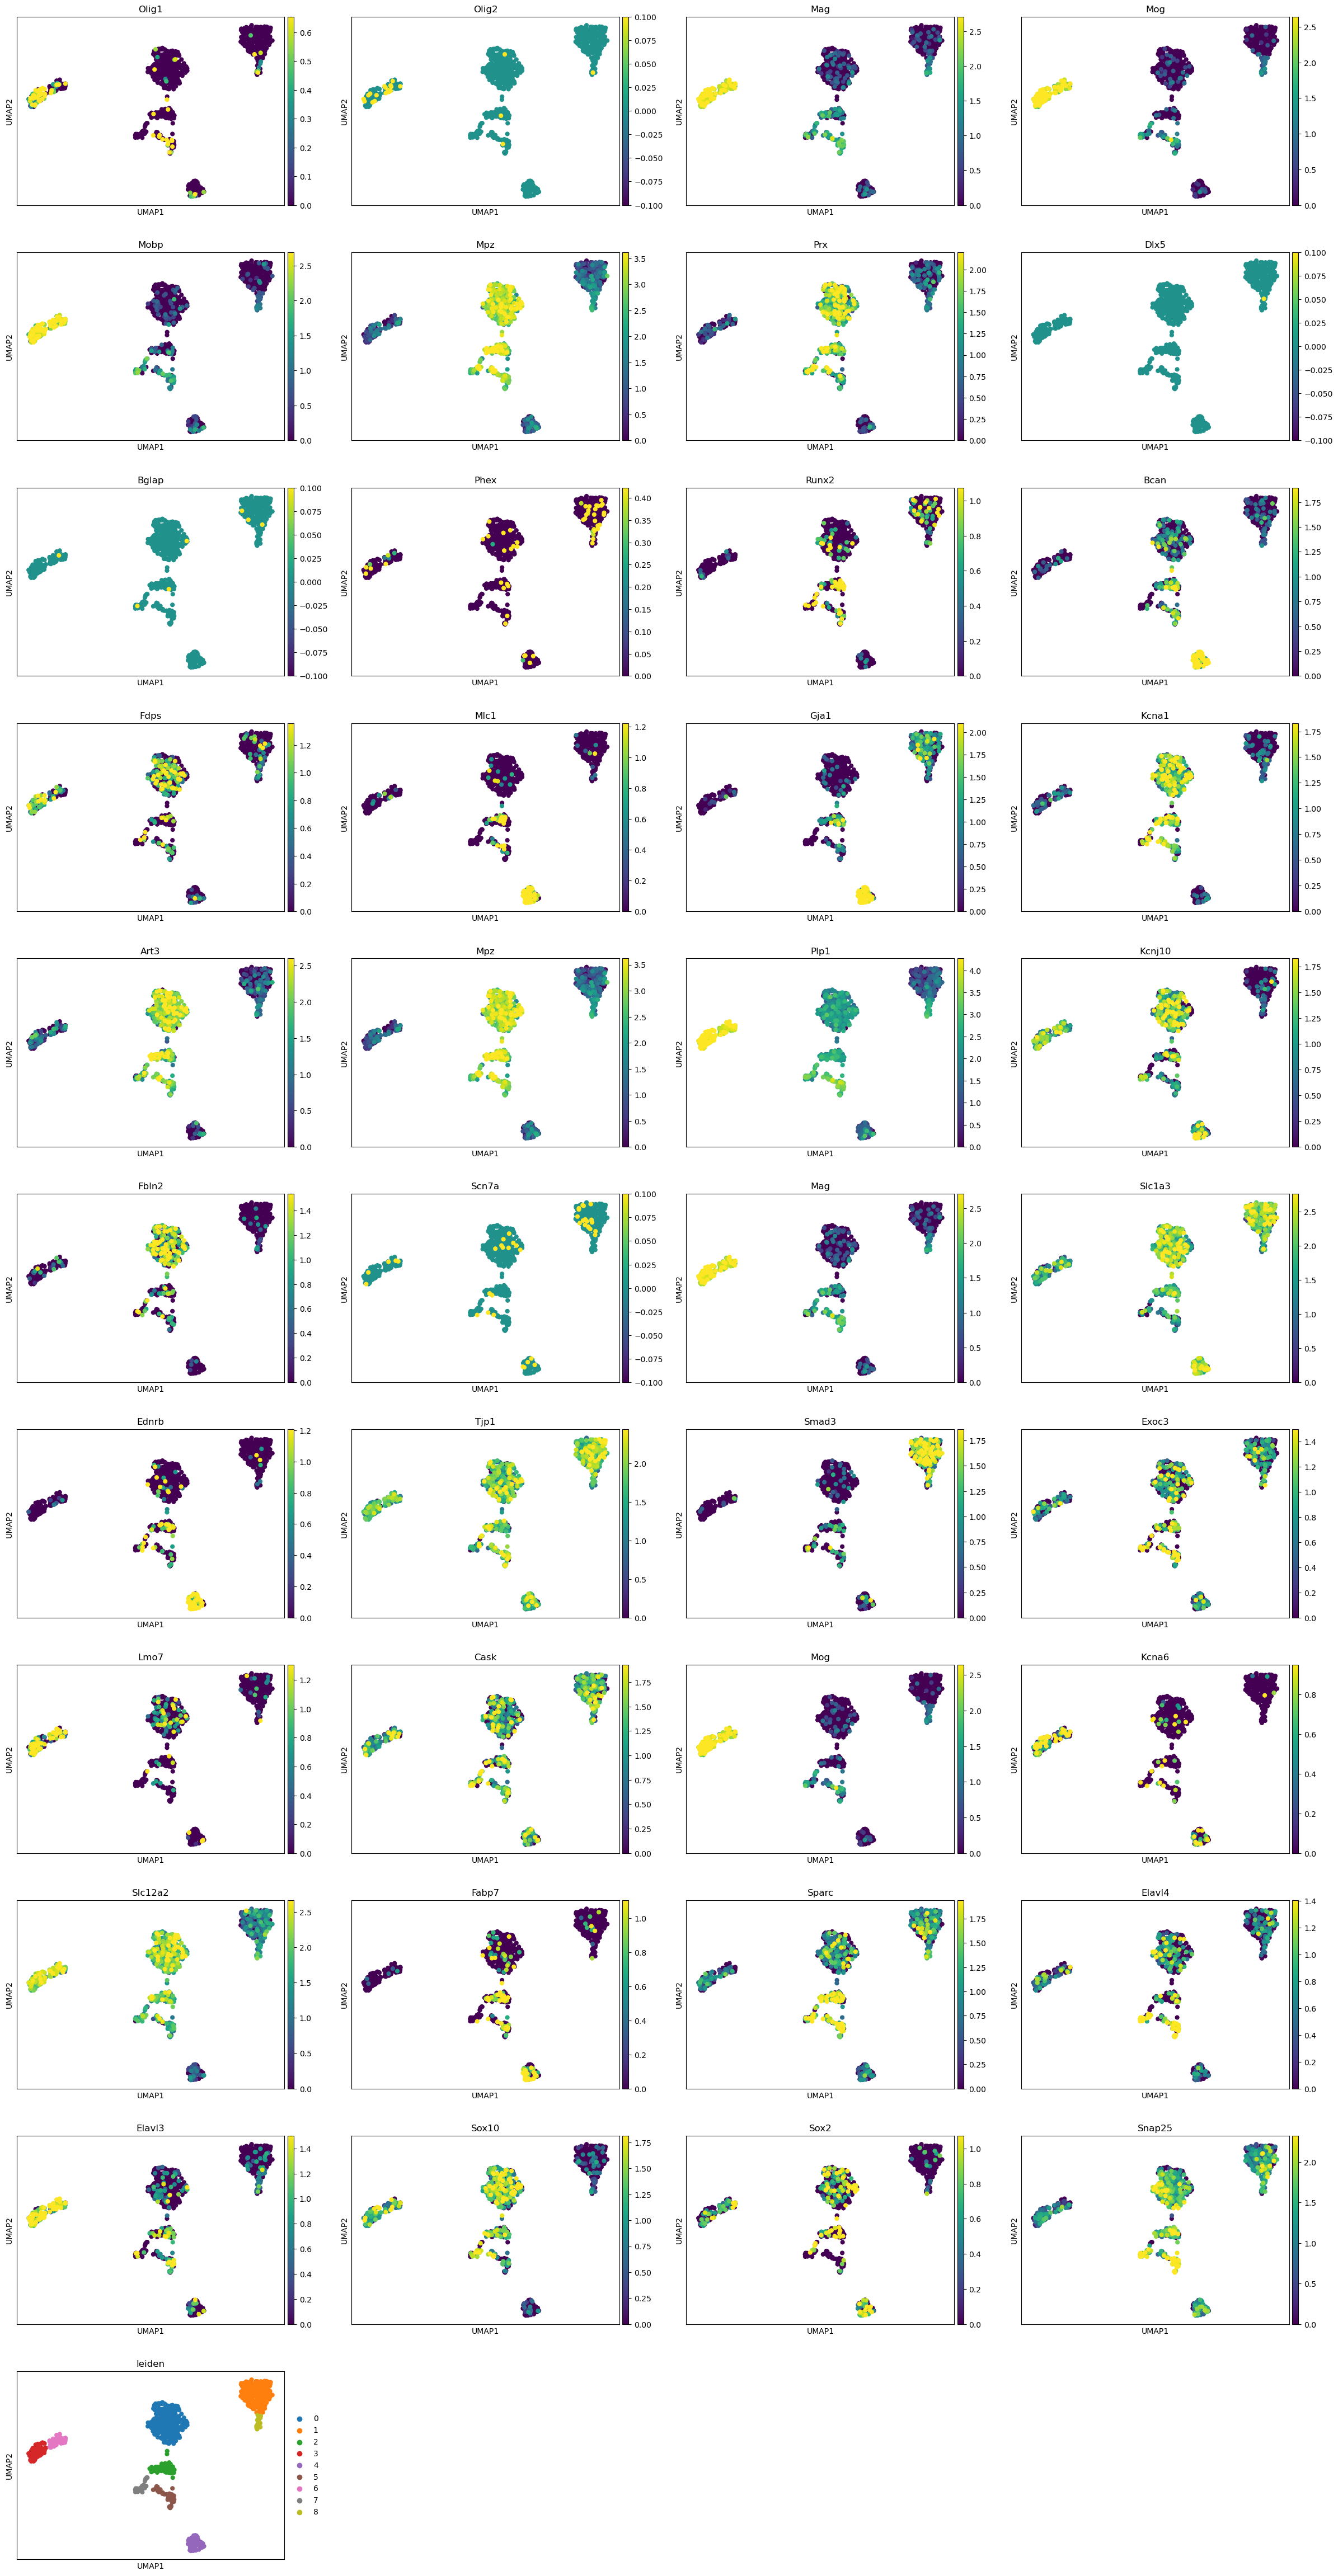

In [5]:
marker=['Olig1','Olig2','Mag','Mog','Mobp','Mpz','Prx','Dlx5','Bglap','Phex','Runx2','Bcan','Fdps','Mlc1','Gja1','Kcna1','Art3','Mpz','Plp1','Kcnj10','Fbln2','Scn7a','Mag','Slc1a3','Ednrb','Tjp1','Smad3','Exoc3','Lmo7','Cask','Mog','Kcna6','Slc12a2','Fabp7','Sparc','Elavl4','Elavl3','Sox10','Sox2','Snap25','leiden']
sc.pl.umap(adata,color=marker,vmax='p95',layer='log1p')

[Executed on 2023-09-05 15:20:32.168859]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


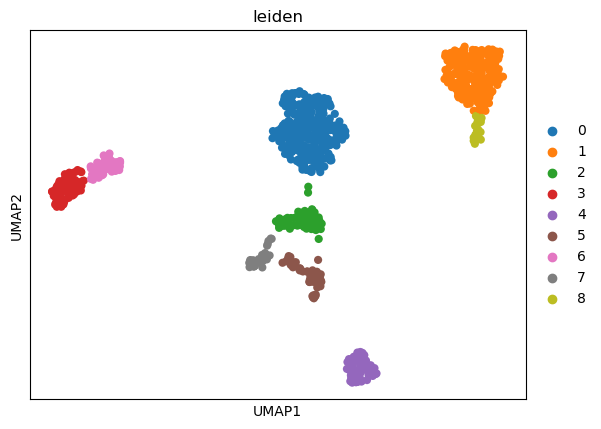

In [6]:
sc.pl.umap(adata,color='leiden',layer='log1p')

In [7]:
adata

[Executed on 2023-09-05 15:20:32.796520]


AnnData object with n_obs × n_vars = 868 × 33241
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_sub'
    var: 'mean', 'std'
    uns: 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap', 'X_umapOriginal'
    layers: 'Scale', 'log1p', 'umi'
    obsp: 'connectivities', 'distances'

In [8]:
adata.obs['leiden'].value_counts()

[Executed on 2023-09-05 15:20:32.804933]


leiden
0    284
1    218
2     78
3     72
4     59
5     53
6     50
7     31
8     23
Name: count, dtype: int64

[Executed on 2023-09-05 15:20:32.817782]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


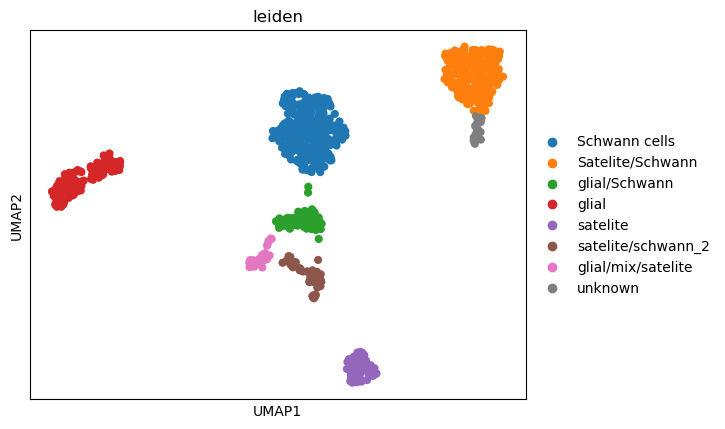

In [9]:
# 0 is Schwann cells, 1 is Satelite/Schwann, 2 is glial/Schwann, 3 is glial, 4 is satelite, 5 is satelite/schwann_2, 6 is glial, 7 is glial/mix/satelite, 8 is unknown
# Create a dictionary mapping old labels to new labels
cluster_rename_dict = {
    '0': 'Schwann cells',
    '1': 'Satelite/Schwann',
    '2': 'glial/Schwann',
    '3': 'glial',
    '4': 'satelite',
    '5': 'satelite/schwann_2',
    '6': 'glial',
    '7': 'glial/mix/satelite',
    '8': 'unknown'
}

# Rename clusters
adata.obs['leiden'] = adata.obs['leiden'].replace(cluster_rename_dict)

sc.pl.umap(adata,color='leiden',layer='log1p')


In [10]:
adata.obs

[Executed on 2023-09-05 15:20:33.399906]


sample_ID_Plate   batch  n_genes  n_genes_by_counts  \
AACCACATCGATCCAAGGAA        11101383  batch2     2067               2066   
AACCACATCGCACGGTGGTT        11101383  batch2     3625               3624   
AACCACATCGCCTACTGAAG        11101383  batch2     4533               4533   
AACCACATCGTATGCACGCT        11101383  batch2     4178               4178   
AACCACATCGTGTCGTCTCG        11101383  batch2     2445               2445   
...                              ...     ...      ...                ...   
TTGGAACCGACTCTCACTGG        11101967  batch1     3788               3788   
TTGGAACCGAGTGACGATCG        11101967  batch1     5481               5475   
TTGTGTTGGATACCGTTGAA        11101840  batch1     5030               5028   
TTGTGTTGGATCGACACGAA        11101840  batch1     5662               5656   
TTGTGTTGGATGGTGAACCT        11101840  batch1     3986               3983   

                      total_counts  total_counts_mt  pct_counts_mt  \
AACCACATCGATCCAAGGAA        3183.0              5.0       0.157085   
AACCACATCGCACGGTGGTT       10178.0              4.0       0.039300   
AACCACATCGCCTACTGAAG       10765.0             13.0       0.120762   
AACCACATCGTATGCACGCT       10714.0             11.0       0.102669   
AACCACATCGTGTCGTCTCG        3802.0             12.0       0.315623   
...                            ...              ...            ...   
TTGGAACCGACTCTCACTGG       11705.0              1.0       0.008543   
TTGGAACCGAGTGACGATCG       28362.0             31.0       0.109301   
TTGTGTTGGATACCGTTGAA       17922.0             10.0       0.055797   
TTGTGTTGGATCGACACGAA       28299.0              7.0       0.024736   
TTGTGTTGGATGGTGAACCT       11909.0              5.0       0.041985   

                                leiden  doublet_scores  predicted_doublets  \
AACCACATCGATCCAAGGAA  Satelite/Schwann        0.095284               False   
AACCACATCGCACGGTGGTT  Satelite/Schwann        0.056225               False   
AACCACATCGCCTACTGAAG     Schwann cells        0.038751               False   
AACCACATCGTATGCACGCT     Schwann cells        0.076167               False   
AACCACATCGTGTCGTCTCG     glial/Schwann        0.059027               False   
...                                ...             ...                 ...   
TTGGAACCGACTCTCACTGG     Schwann cells        0.076167               False   
TTGGAACCGAGTGACGATCG             glial        0.030928               False   
TTGTGTTGGATACCGTTGAA  Satelite/Schwann        0.089903               False   
TTGTGTTGGATCGACACGAA          satelite        0.024643               False   
TTGTGTTGGATGGTGAACCT  Satelite/Schwann        0.022463               False   

                         sex leiden_sub  
AACCACATCGATCCAAGGAA    male        NaN  
AACCACATCGCACGGTGGTT  female        NaN  
AACCACATCGCCTACTGAAG    male        NaN  
AACCACATCGTATGCACGCT    male        NaN  
AACCACATCGTGTCGTCTCG    male        NaN  
...                      ...        ...  
TTGGAACCGACTCTCACTGG  female        NaN  
TTGGAACCGAGTGACGATCG    male        NaN  
TTGTGTTGGATACCGTTGAA  female        NaN  
TTGTGTTGGATCGACACGAA  female        NaN  
TTGTGTTGGATGGTGAACCT  female        NaN  

[868 rows x 12 columns]

[Executed on 2023-09-05 15:20:33.662848]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


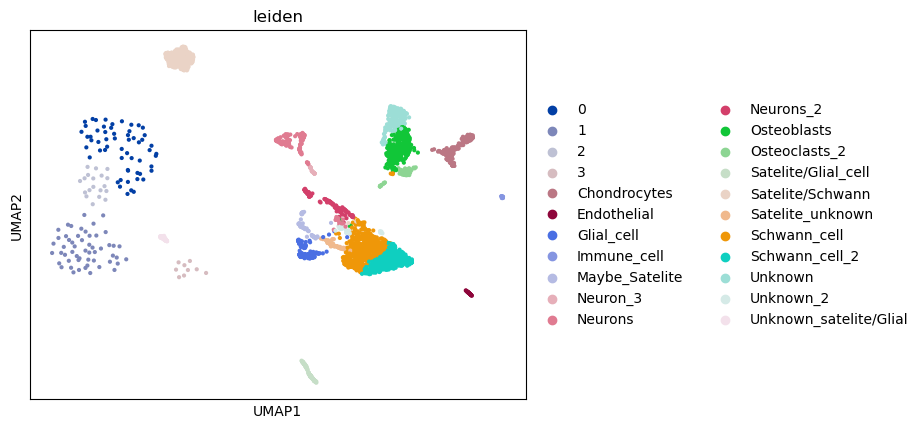

In [11]:
import scanpy as sc
combined=sc.read_h5ad('/proj/sensoryaging/data/data/up_dated_data/SGNs/combined.h5ad')
sc.pl.umap(combined,color='leiden')

[Executed on 2023-09-05 15:20:37.506234]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


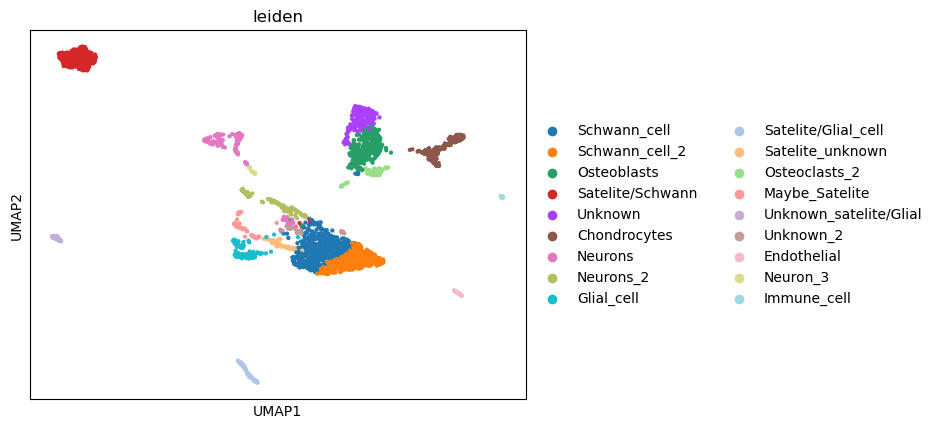

In [12]:
import scanpy as sc
modified=sc.read_h5ad("/proj/sensoryaging/data/data/up_dated_data/SGNs/modified_intersection_16_plates.h5ad")
ad_filtered3=sc.read_h5ad("/proj/sensoryaging/data/data/up_dated_data/SGNs/filter3butfinal.h5ad")
combined=sc.read_h5ad('/proj/sensoryaging/data/data/up_dated_data/SGNs/combined.h5ad')
sc.pl.umap(modified,color='leiden')

In [13]:
modified.obs['leiden'].value_counts()

[Executed on 2023-09-05 15:20:53.059133]


leiden
Schwann_cell              564
Schwann_cell_2            445
Osteoblasts               370
Satelite/Schwann          306
Unknown                   249
Chondrocytes              204
Neurons                   183
Neurons_2                 130
Glial_cell                129
Satelite/Glial_cell       122
Satelite_unknown           93
Osteoclasts_2              91
Maybe_Satelite             78
Unknown_satelite/Glial     63
Unknown_2                  41
Endothelial                40
Neuron_3                   28
Immune_cell                22
Name: count, dtype: int64

In [14]:
# Ensure that the index (unique identifier for cells) of adata is also present in modified
assert all(adata.obs.index.isin(combined.obs.index))

# Map the 'leiden' annotations of subset (adata) back to the main (modified)
combined.obs.loc[adata.obs.index, 'subset_leiden'] = adata.obs['leiden']

# Check the counts
print(combined.obs['subset_leiden'].value_counts(dropna=False))


[Executed on 2023-09-05 15:20:53.080195]
subset_leiden
NaN                   2430
Schwann cells          284
Satelite/Schwann       218
glial                  122
glial/Schwann           78
satelite                59
satelite/schwann_2      53
glial/mix/satelite      31
unknown                 23
Name: count, dtype: int64


[Executed on 2023-09-05 15:20:53.106041]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


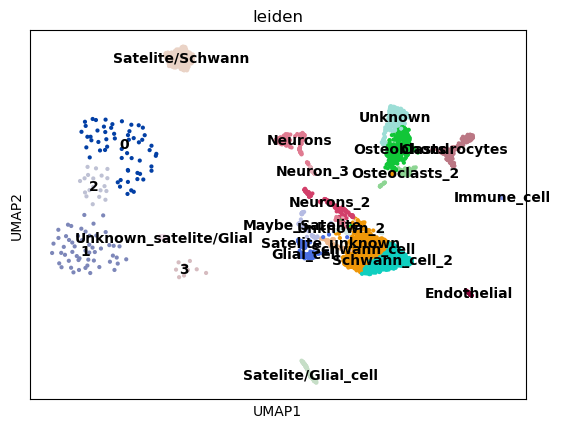

In [15]:
sc.pl.umap(combined,color='leiden',legend_loc='on data',legend_fontsize=10)

[Executed on 2023-09-05 15:33:48.960541]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


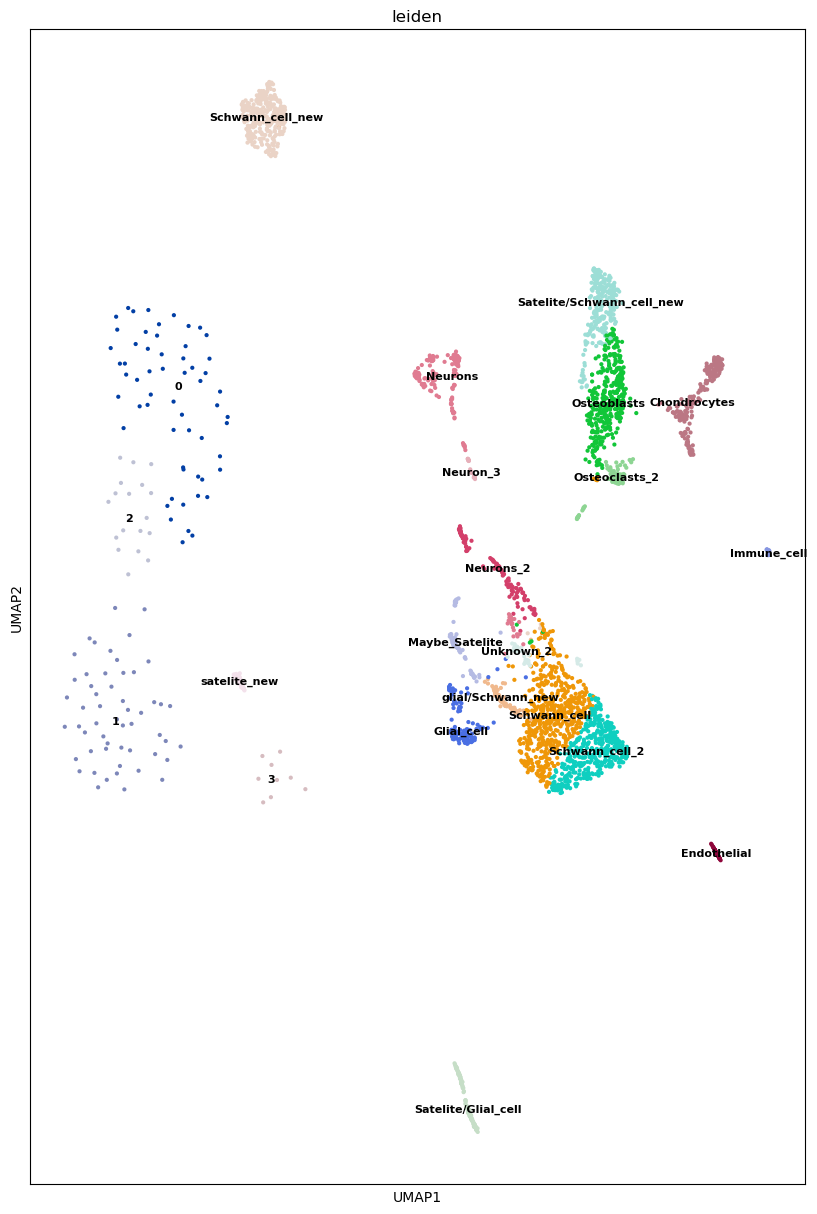

In [36]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 15))

sc.pl.umap(combined,legend_fontsize=8,color=['leiden'],legend_loc='on data',ax=ax)

[Executed on 2023-09-05 15:34:45.193056]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


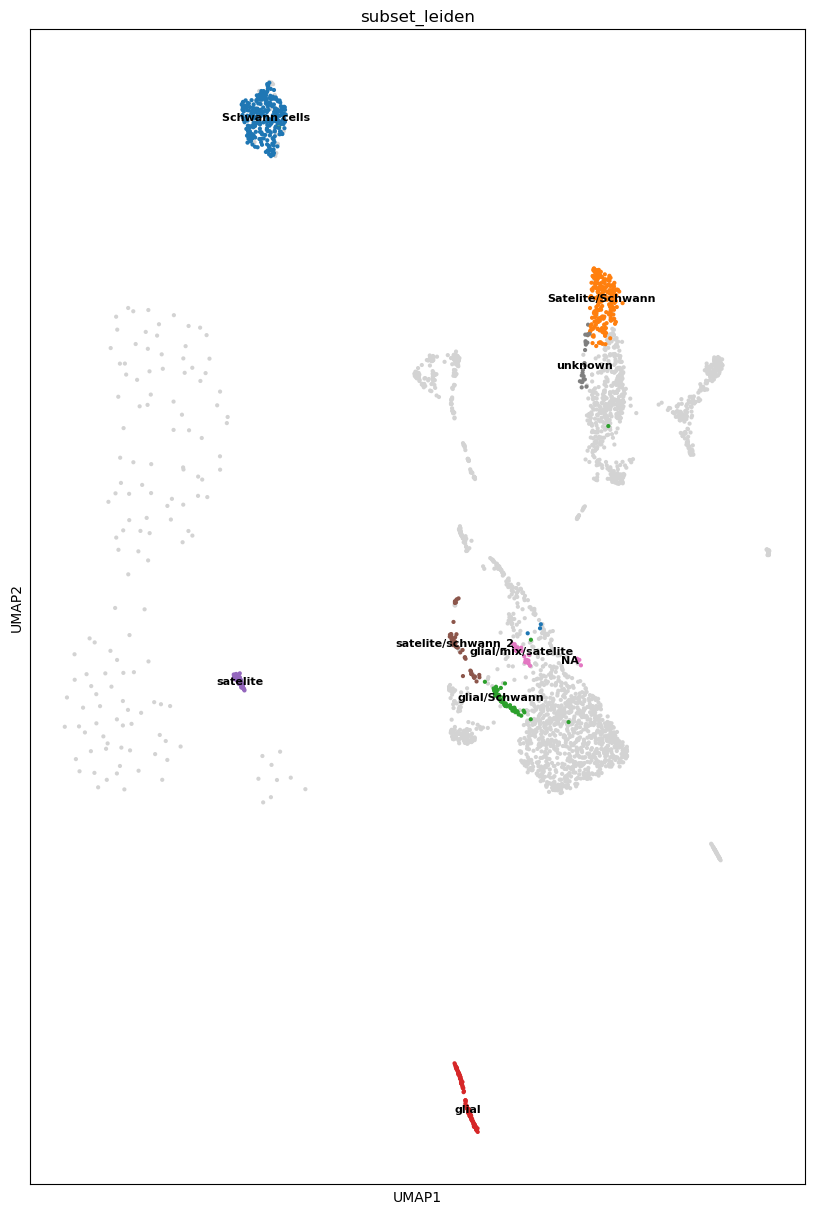

In [38]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 15))

sc.pl.umap(combined,legend_fontsize=8,color=['subset_leiden'],ax=ax,legend_loc='on data')

In [17]:
combined.obs['leiden'].value_counts()

[Executed on 2023-09-05 15:20:54.106097]


leiden
Schwann_cell              564
Schwann_cell_2            445
Osteoblasts               370
Satelite/Schwann          306
Unknown                   249
Chondrocytes              204
Neurons                   183
Neurons_2                 130
Glial_cell                129
Satelite/Glial_cell       122
Satelite_unknown           93
Osteoclasts_2              91
Maybe_Satelite             78
Unknown_satelite/Glial     63
0                          58
1                          54
Unknown_2                  41
Endothelial                40
Neuron_3                   28
Immune_cell                22
2                          19
3                           9
Name: count, dtype: int64

In [39]:
combined.obs['subset_leiden'].value_counts()

[Executed on 2023-09-05 15:35:52.064837]


subset_leiden
Schwann cells         284
Satelite/Schwann      218
glial                 122
glial/Schwann          78
satelite               59
satelite/schwann_2     53
glial/mix/satelite     31
unknown                23
Name: count, dtype: int64

In [18]:
# Assuming you've already done this step, just to reiterate:
combined.obs.loc[adata.obs.index, 'subset_leiden'] = adata.obs['leiden']


[Executed on 2023-09-05 15:20:54.117889]


In [40]:
# Create a dictionary for renaming
rename_dict = {
    'Satelite/Schwann': 'Schwann_cell_new',
    'Unknown': 'Satelite/Schwann_cell_new',
    'Satelite_unknown': 'glial/Schwann_new',
    'Unknown_satelite/Glial': 'satelite_new',
    'Unknown_2': 'glial/mix/satelite'
}

# Apply the renaming
combined.obs['leiden'] = combined.obs['leiden'].replace(rename_dict)

# Check the counts after renaming
print(combined.obs['leiden'].value_counts())


[Executed on 2023-09-05 15:36:09.160160]
leiden
Schwann_cell                 564
Schwann_cell_2               445
Osteoblasts                  370
Schwann_cell_new             306
Satelite/Schwann_cell_new    249
Chondrocytes                 204
Neurons                      183
Neurons_2                    130
Glial_cell                   129
Satelite/Glial_cell          122
glial/Schwann_new             93
Osteoclasts_2                 91
Maybe_Satelite                78
satelite_new                  63
0                             58
1                             54
glial/mix/satelite            41
Endothelial                   40
Neuron_3                      28
Immune_cell                   22
2                             19
3                              9
Name: count, dtype: int64


In [41]:
combined

[Executed on 2023-09-05 15:36:18.558791]


AnnData object with n_obs × n_vars = 3298 × 33241
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_sub', 'subset_leiden'
    uns: 'leiden_colors', 'subset_leiden_colors', 'leiden_sub_colors'
    obsm: 'X_pca', 'X_umap', 'X_umapOriginal'
    layers: 'Scale', 'log1p', 'umi'

[Executed on 2023-09-05 15:40:06.682433]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


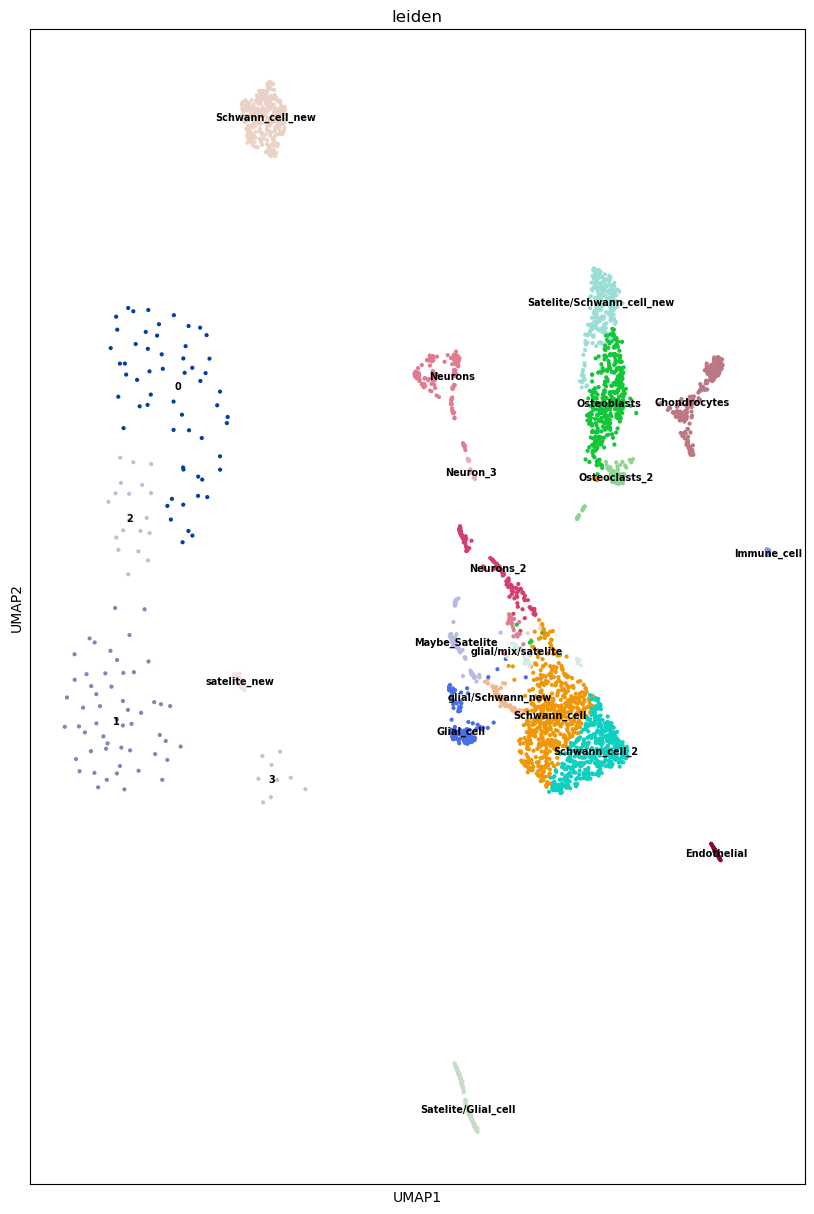

In [45]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 15))
sc.pl.umap(combined, color='leiden', legend_loc='on data', legend_fontsize=7, ax=ax,save='fulllabel.pdf')


In [43]:
combined.write_h5ad('/proj/sensoryaging/data/data/up_dated_data/SGNs/9.5_full_label.h5ad')

[Executed on 2023-09-05 15:38:12.856752]


In [79]:
combined=sc.read_h5ad('/proj/sensoryaging/data/data/up_dated_data/SGNs/9.5_full_label.h5ad')

[Executed on 2023-09-05 16:30:50.704974]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [70]:
Satelite_Glial_marker=['Bcan','Gja1','Mlc1','Ednrb','Fabp7','Cdh19','Fbln2','leiden']
#sc.pl.umap(combined,color=Satelite_Glial_marker,vmax='p95',layer='umi')

[Executed on 2023-09-05 16:04:25.163355]


In [64]:
combined

[Executed on 2023-09-05 15:58:48.755886]


AnnData object with n_obs × n_vars = 3298 × 33241
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_sub', 'subset_leiden'
    uns: 'leiden_colors', 'leiden_sub_colors', 'subset_leiden_colors'
    obsm: 'X_pca', 'X_umap', 'X_umapOriginal'
    layers: 'Scale', 'log1p', 'umi'

[Executed on 2023-09-05 16:04:33.004691]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


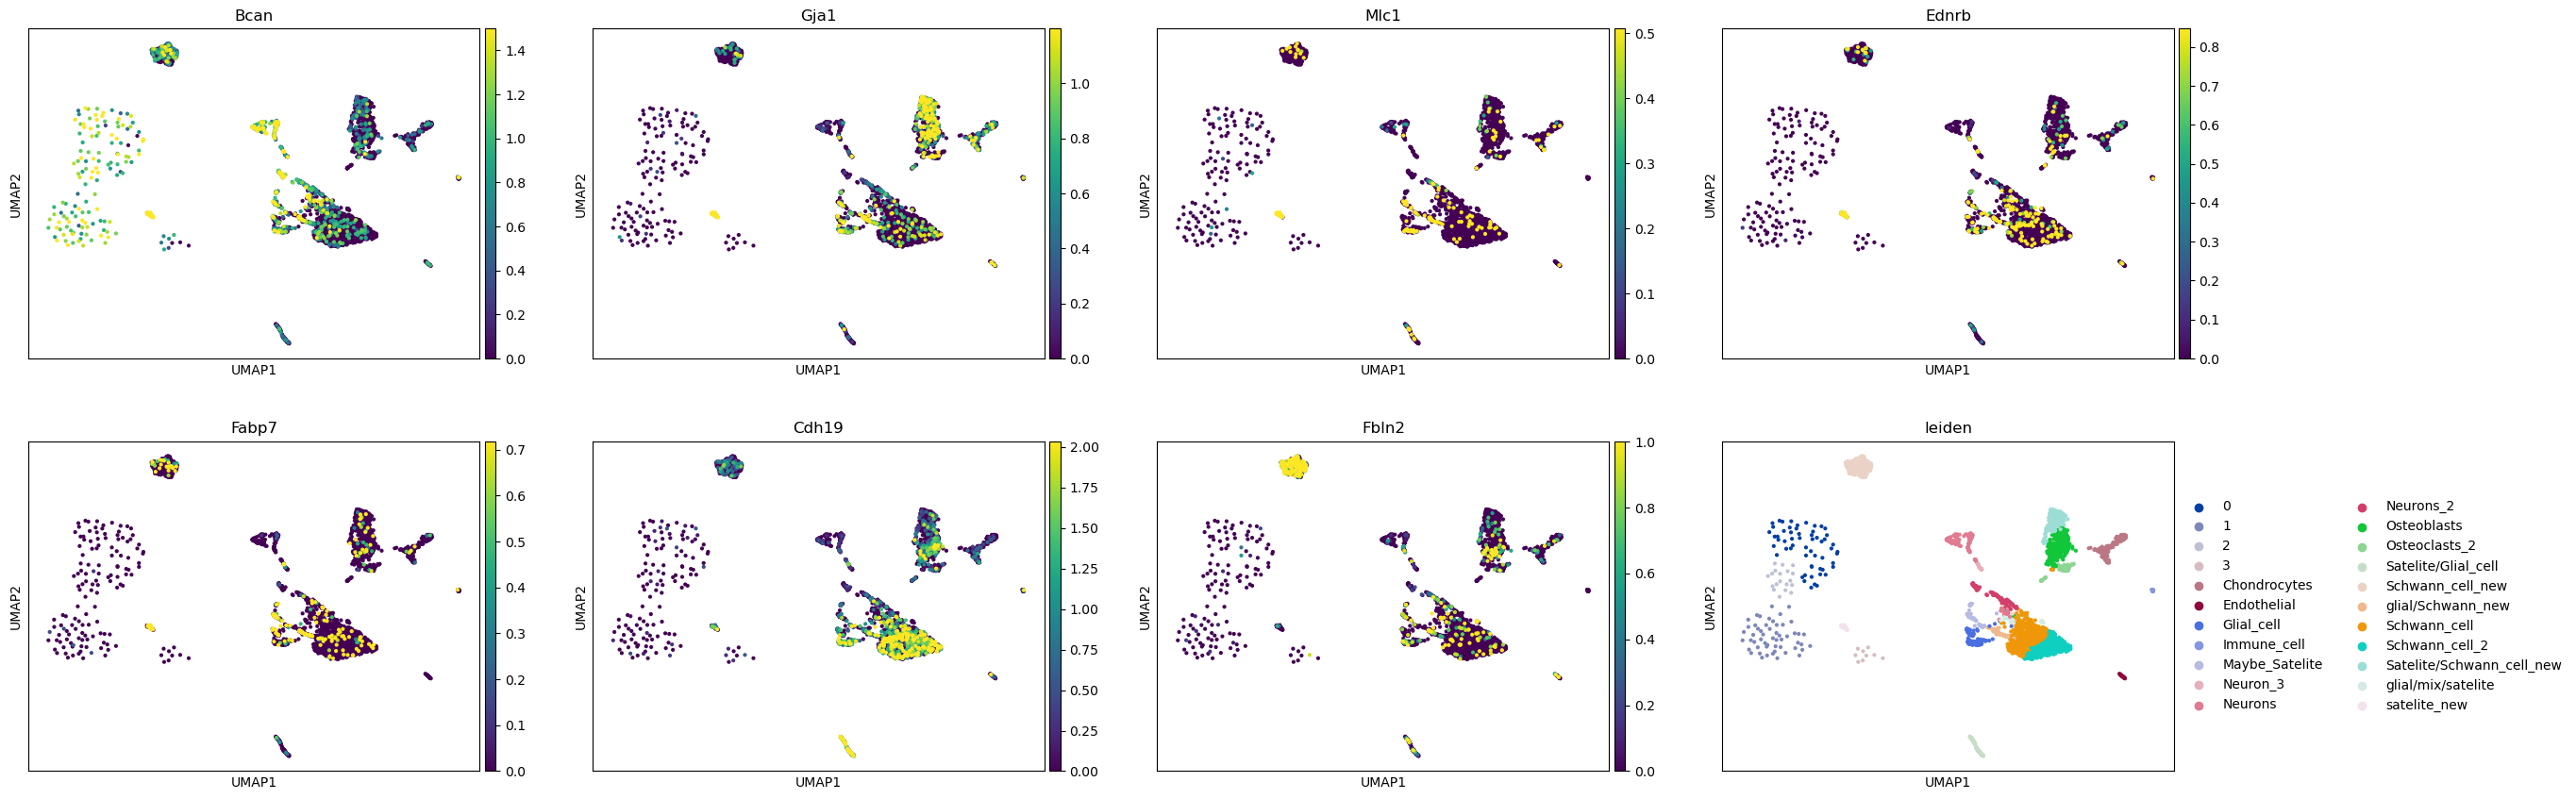

In [71]:
sc.pl.umap(combined,color=Satelite_Glial_marker,layer='log1p',vmax='p95',save='Satelite_Glial_marker.pdf')

In [52]:
combined

[Executed on 2023-09-05 15:49:41.578984]


View of AnnData object with n_obs × n_vars = 3158 × 33241
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_sub', 'subset_leiden'
    uns: 'leiden_colors', 'subset_leiden_colors', 'leiden_sub_colors'
    obsm: 'X_pca', 'X_umap', 'X_umapOriginal'
    layers: 'Scale', 'log1p', 'umi'

In [67]:
del combined.layers['Scale']
del combined.layers['log1p']
combined.X = combined.layers['umi'].copy()
sc.pp.normalize_total(combined, target_sum=None)
sc.pp.log1p(combined)
combined.layers['log1p'] = combined.X.copy()
sc.pp.scale(combined, max_value=10)
combined.layers['Scale'] = combined.X.copy()

[Executed on 2023-09-05 16:00:03.104515]


In [57]:
combined.obs['leiden'].value_counts()

[Executed on 2023-09-05 15:54:25.651117]


leiden
0     564
1     445
2     370
3     306
4     249
5     204
6     183
7     130
8     129
9     122
10     93
11     91
12     78
13     63
14     41
15     40
16     28
17     22
Name: count, dtype: int64

[Executed on 2023-09-05 16:20:53.793508]


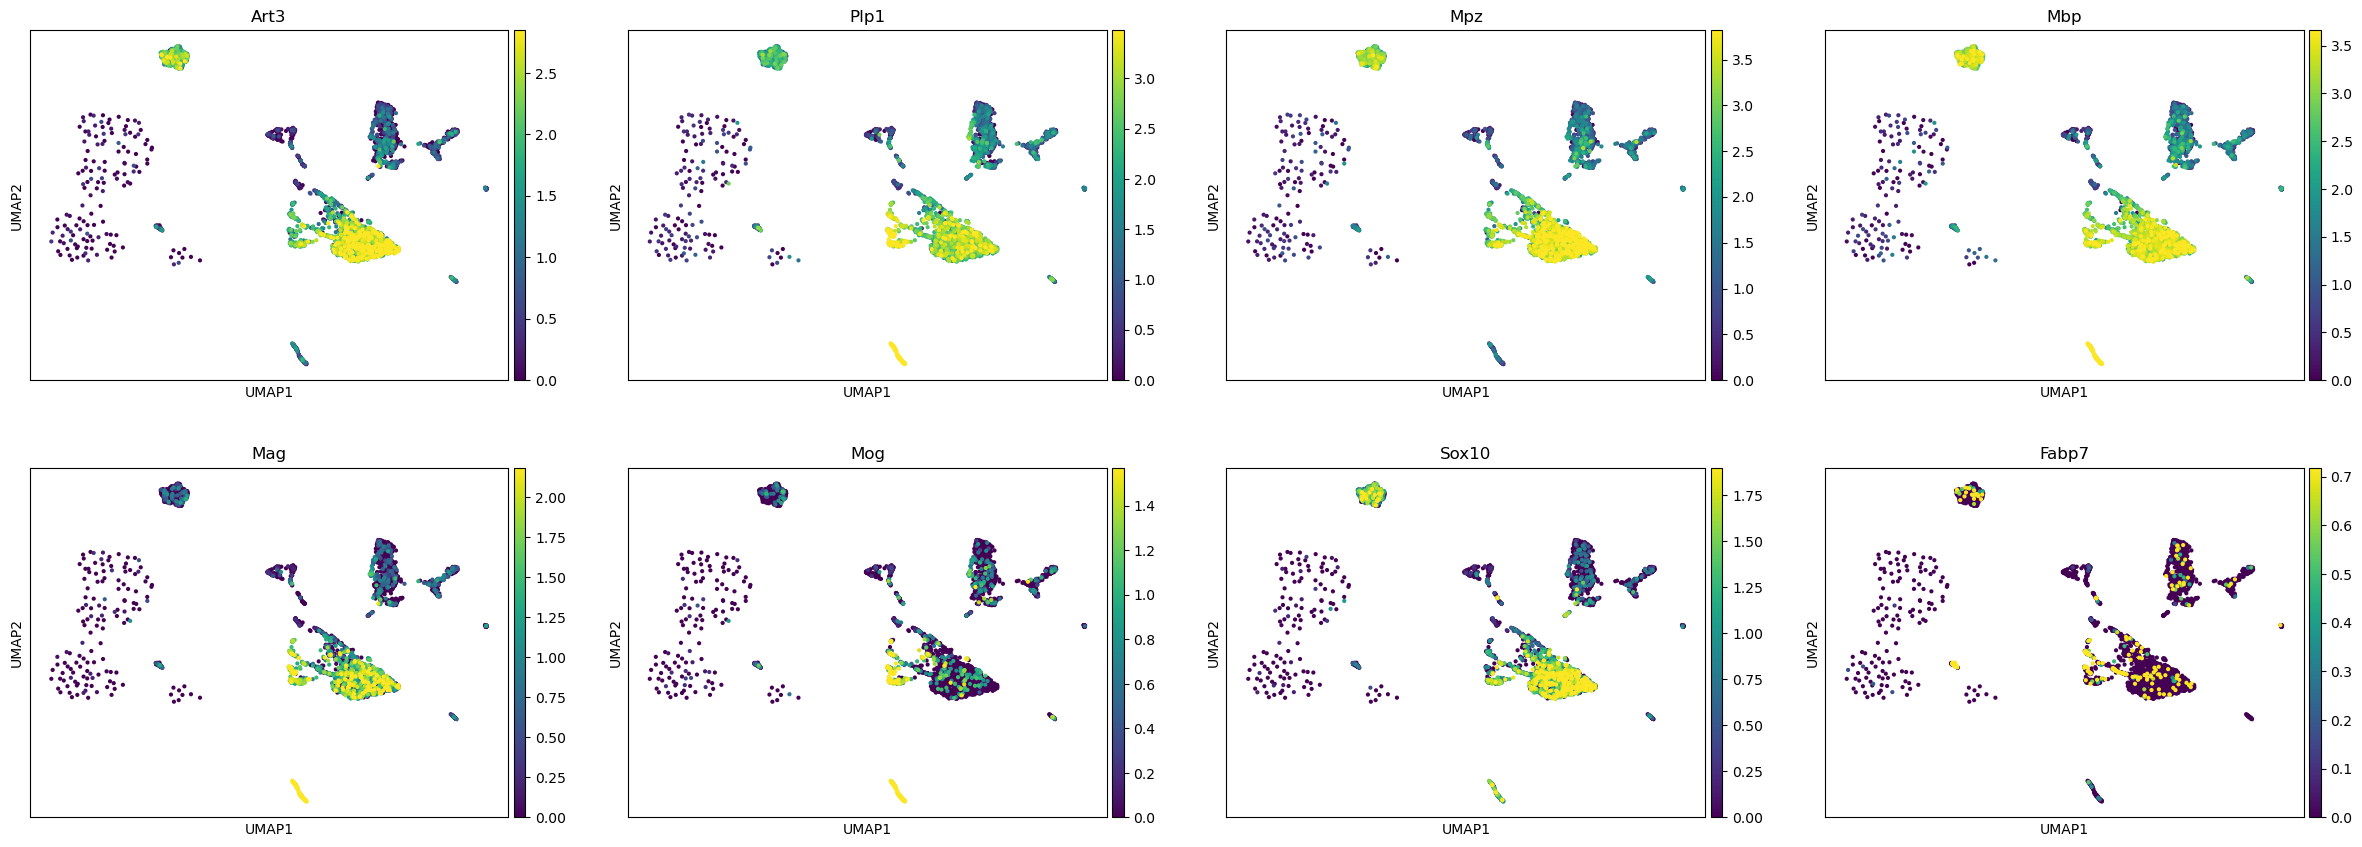

In [72]:
schwann_cell=['Art3','Plp1','Mpz','Mbp','Mag','Mog','Sox10','Fabp7']
sc.pl.umap(combined,color=schwann_cell,layer='log1p',vmax='p95')

[Executed on 2023-09-05 16:25:52.197241]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


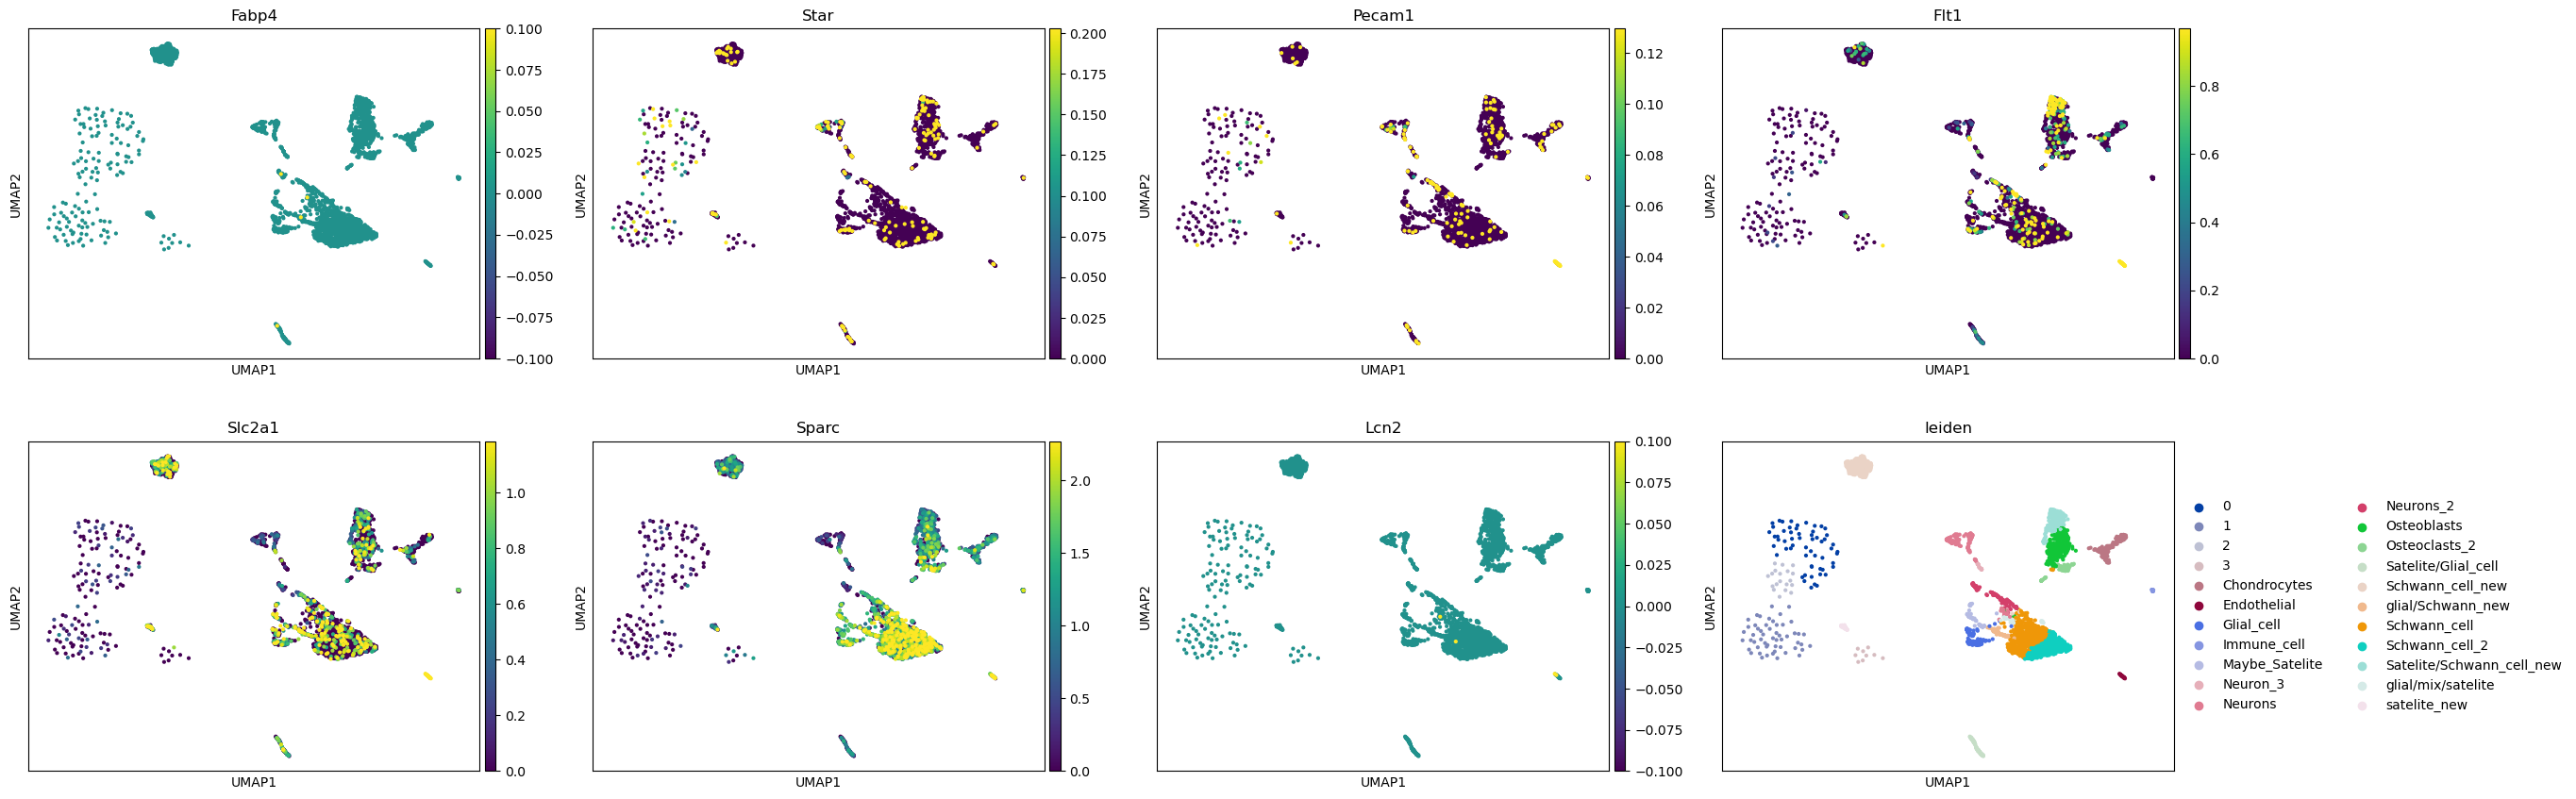

In [73]:
Endotelial_marker=['Fabp4','Star','Pecam1','Flt1','Slc2a1','Sparc','Lcn2','leiden']
sc.pl.umap(combined,color=Endotelial_marker,layer='log1p',vmax='p95')

[Executed on 2023-09-05 16:26:28.969557]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


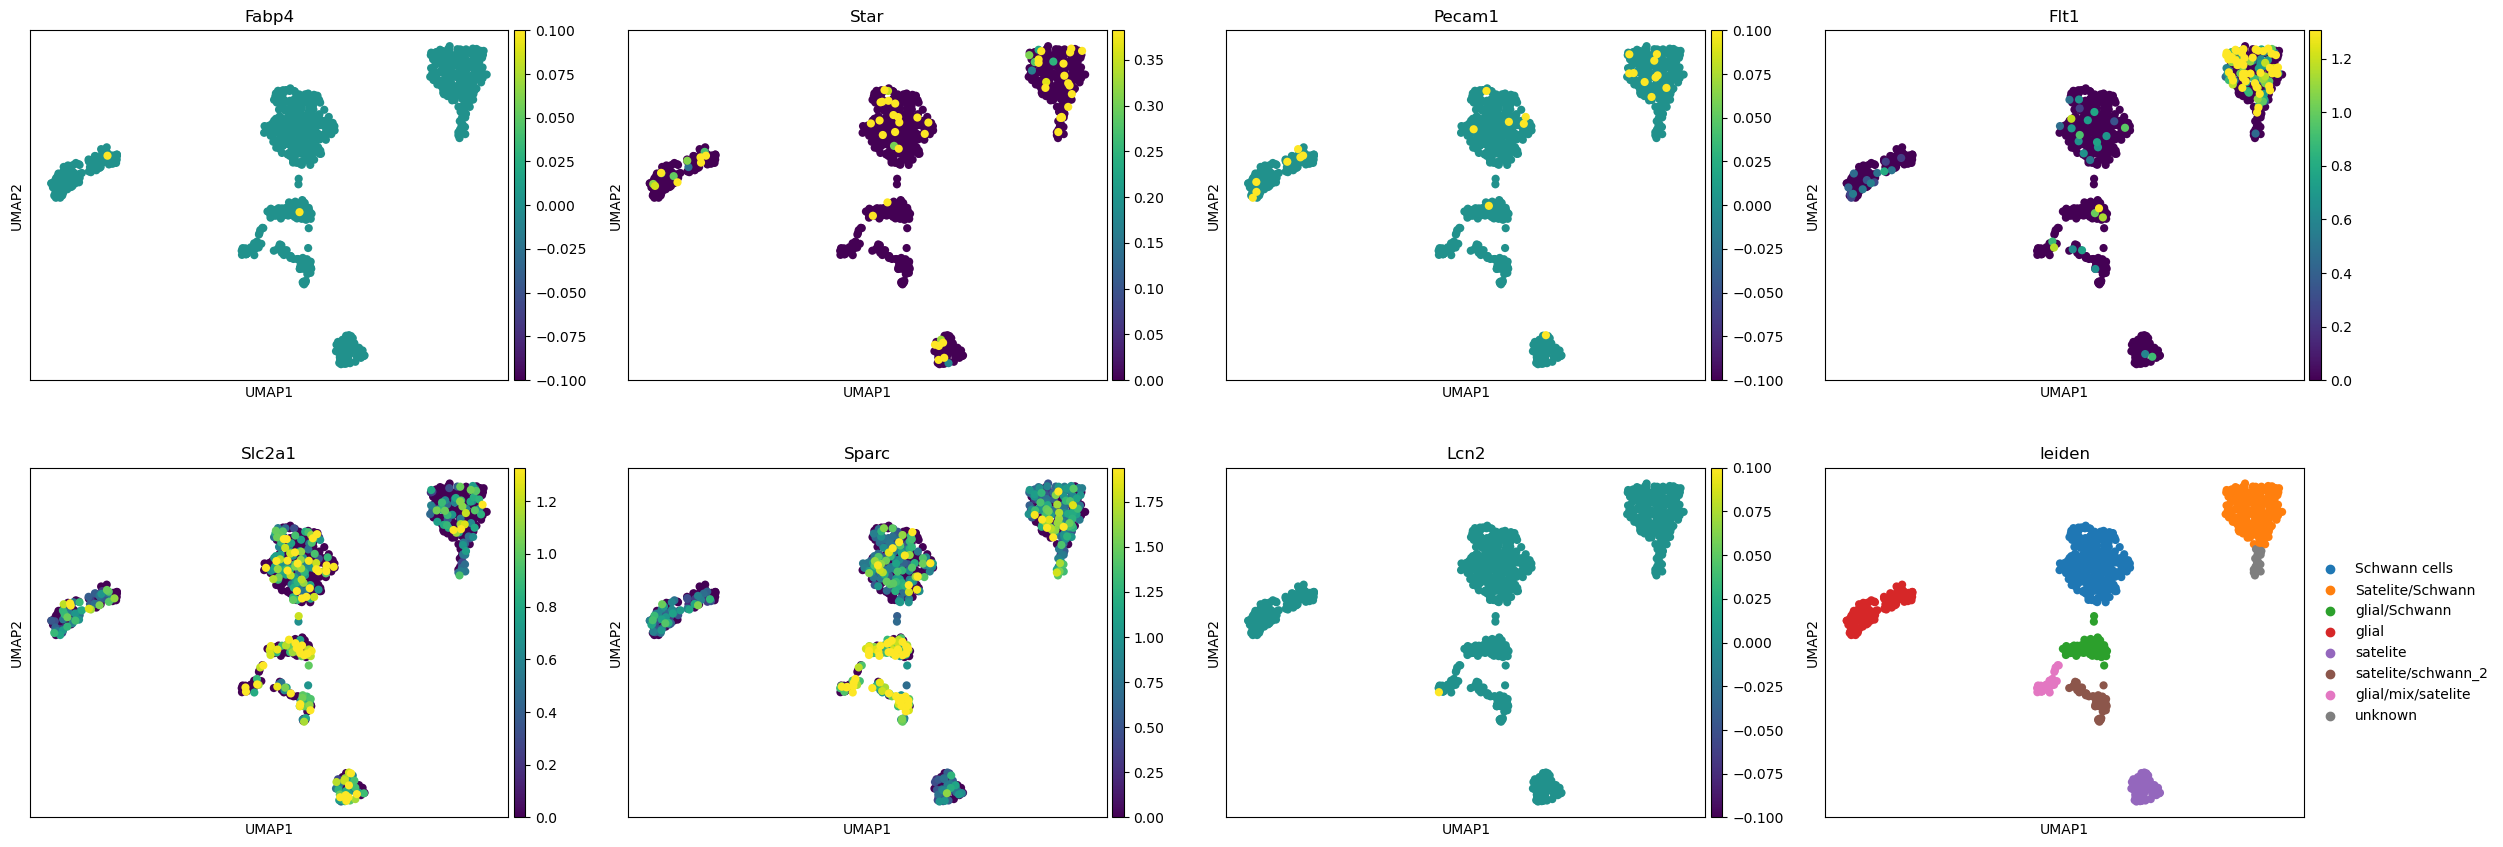

In [74]:
sc.pl.umap(adata,color=Endotelial_marker,layer='log1p',vmax='p95')

[Executed on 2023-09-05 16:31:04.257534]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2

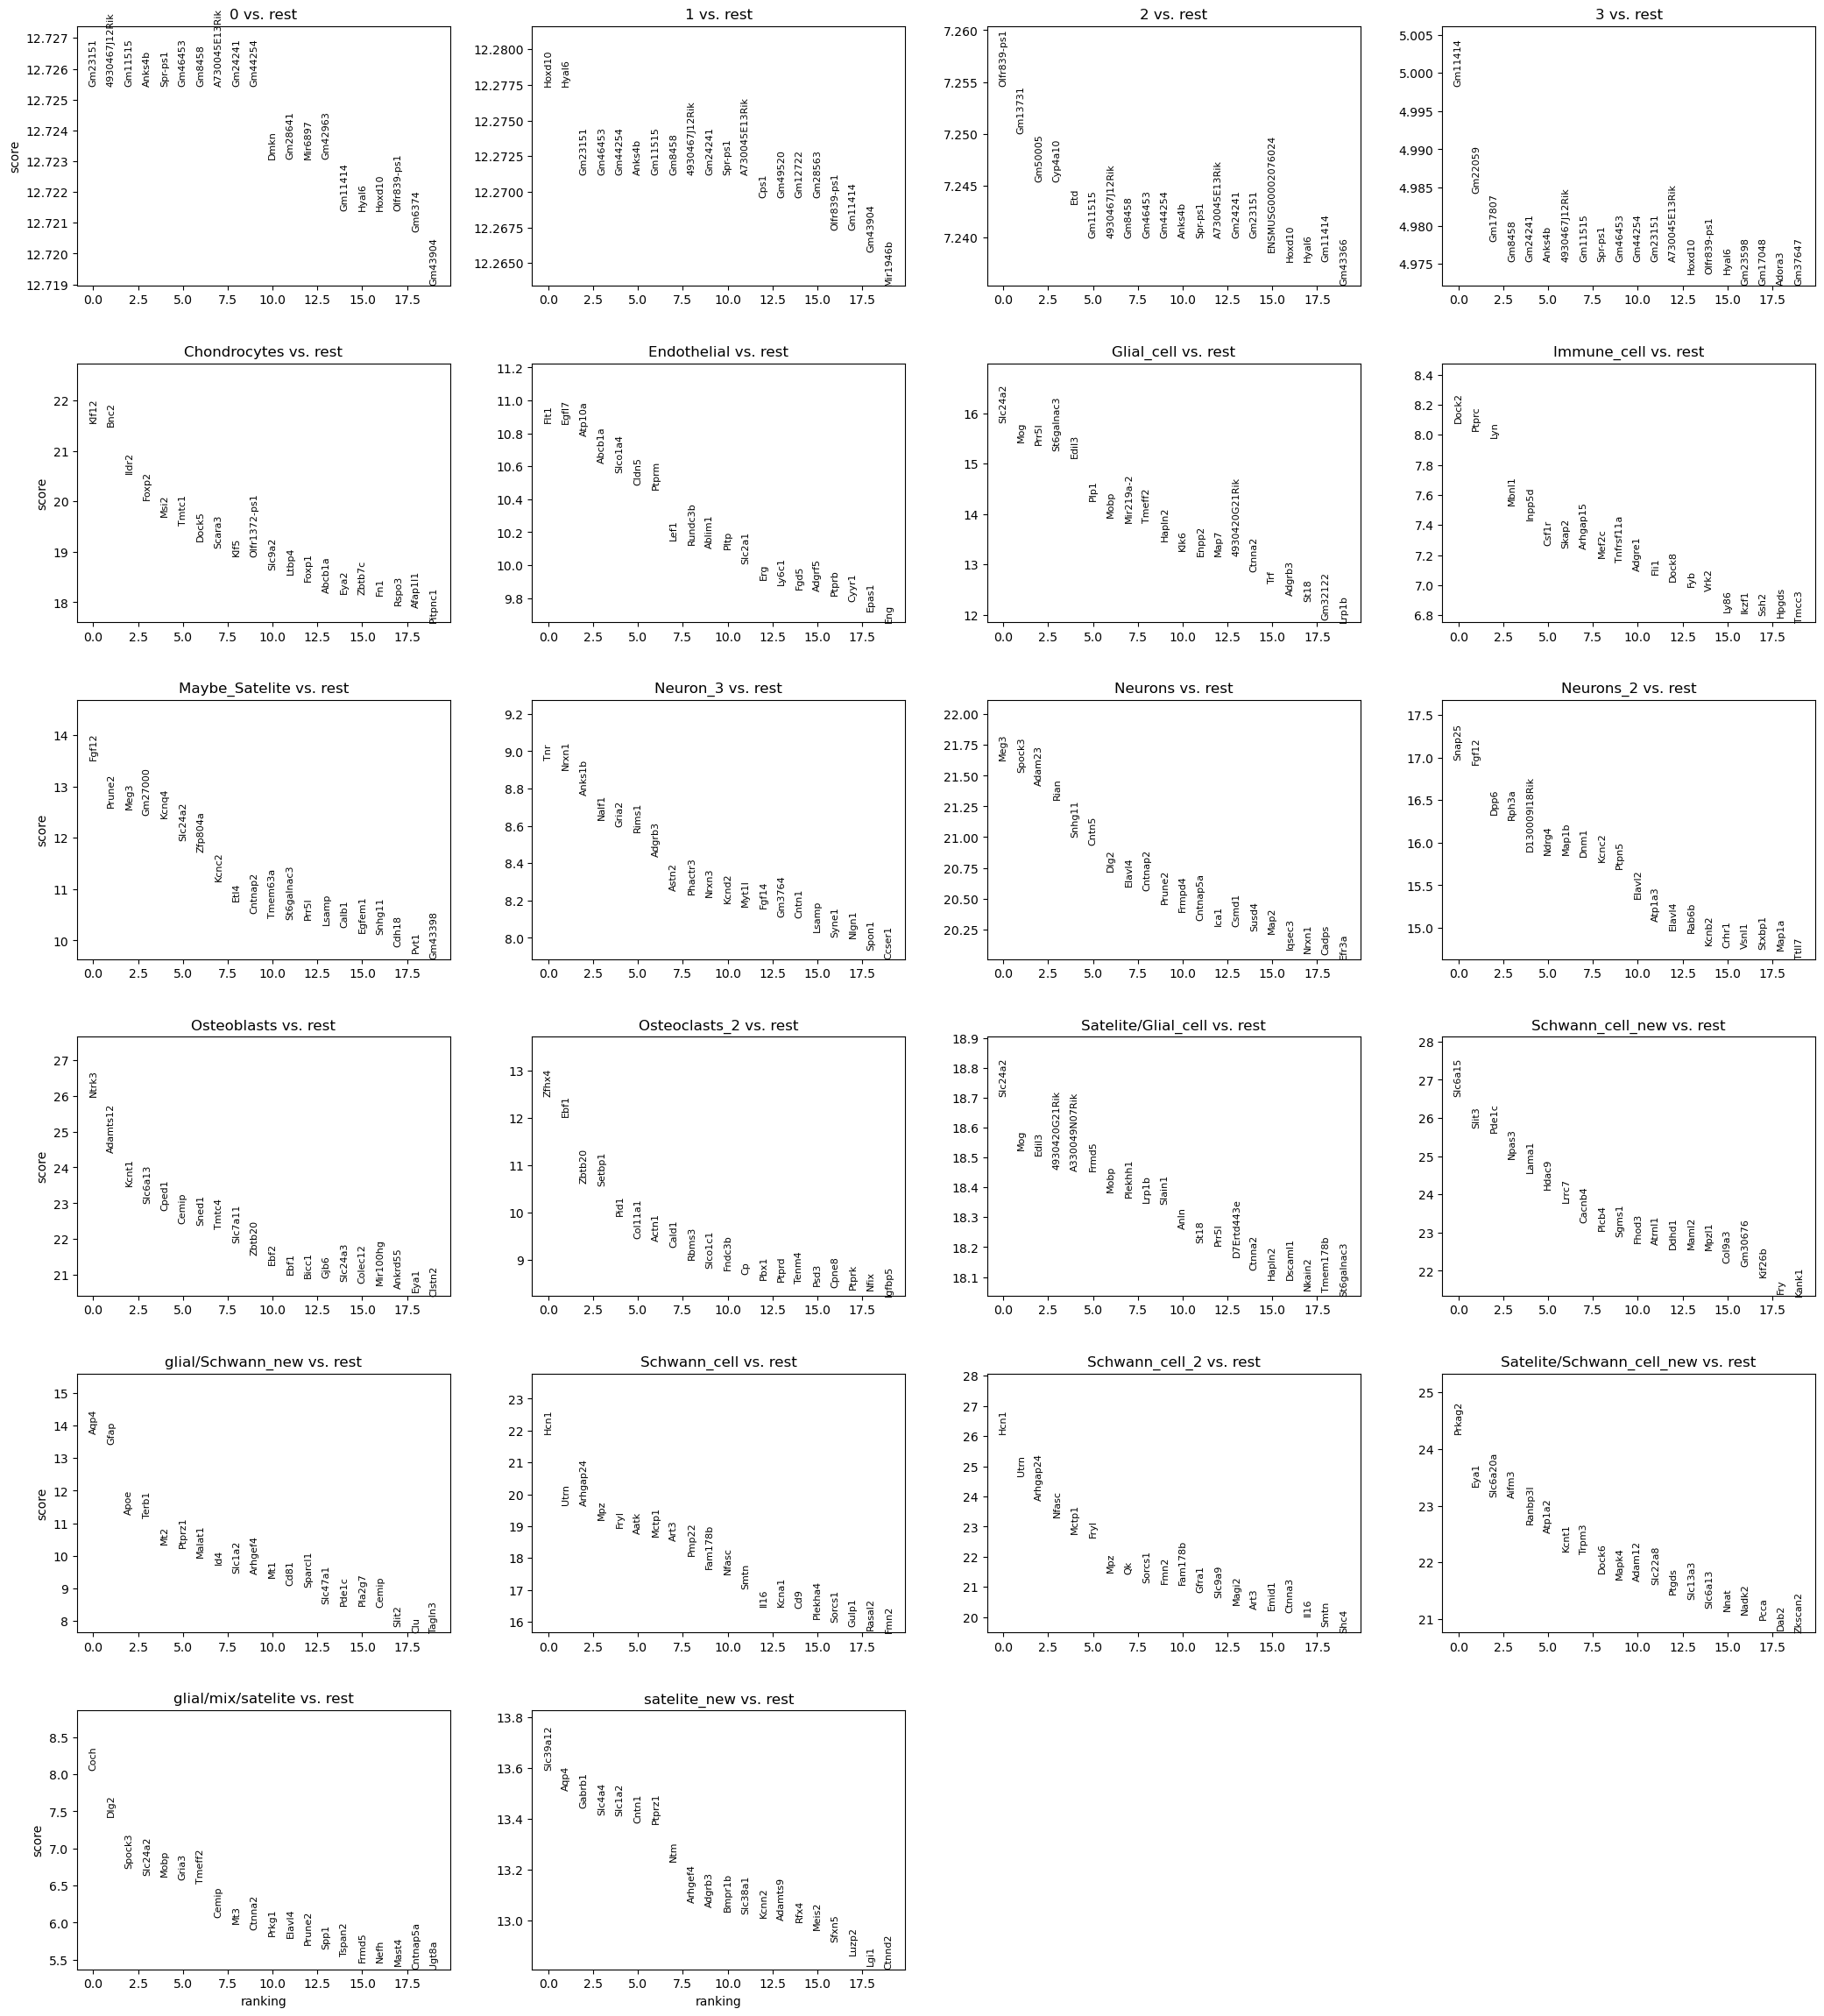

0              1                   2              3  \
0         Gm23151         Hoxd10         Olfr839-ps1        Gm11414   
1   4930467J12Rik          Hyal6             Gm13731        Gm22059   
2         Gm11515        Gm23151             Gm50005        Gm17807   
3          Anks4b        Gm46453             Cyp4a10         Gm8458   
4         Spr-ps1        Gm44254                 Etd        Gm24241   
5         Gm46453         Anks4b             Gm11515         Anks4b   
6          Gm8458        Gm11515       4930467J12Rik  4930467J12Rik   
7   A730045E13Rik         Gm8458              Gm8458        Gm11515   
8         Gm24241  4930467J12Rik             Gm46453        Spr-ps1   
9         Gm44254        Gm24241             Gm44254        Gm46453   
10           Dmkn        Spr-ps1              Anks4b        Gm44254   
11        Gm28641  A730045E13Rik             Spr-ps1        Gm23151   
12        Mir6897           Cps1       A730045E13Rik  A730045E13Rik   
13        Gm42963        Gm49520             Gm24241         Hoxd10   
14        Gm11414        Gm12722             Gm23151    Olfr839-ps1   
15          Hyal6        Gm28563  ENSMUSG00002076024          Hyal6   
16         Hoxd10    Olfr839-ps1              Hoxd10        Gm23598   
17    Olfr839-ps1        Gm11414               Hyal6        Gm17048   
18         Gm6374        Gm43904             Gm11414         Adora3   
19        Gm43904       Mir1946b             Gm43366        Gm37647   

    Chondrocytes Endothelial     Glial_cell Immune_cell Maybe_Satelite  \
0          Klf12        Flt1        Slc24a2       Dock2          Fgf12   
1           Bnc2       Egfl7            Mog       Ptprc         Prune2   
2          Ildr2      Atp10a          Prr5l         Lyn           Meg3   
3          Foxp2      Abcb1a     St6galnac3       Mbnl1        Gm27000   
4           Msi2     Slco1a4          Edil3      Inpp5d          Kcnq4   
5          Tmtc1       Cldn5           Plp1       Csf1r        Slc24a2   
6          Dock5       Ptprm           Mobp       Skap2        Zfp804a   
7         Scara3        Lef1      Mir219a-2    Arhgap15          Kcnc2   
8           Klf5     Rundc3b         Tmeff2       Mef2c           Etl4   
9   Olfr1372-ps1      Ablim1         Hapln2   Tnfrsf11a        Cntnap2   
10        Slc9a2        Pltp           Klk6      Adgre1        Tmem63a   
11         Ltbp4      Slc2a1          Enpp2        Fli1     St6galnac3   
12         Foxp1         Erg           Map7       Dock8          Prr5l   
13        Abcb1a       Ly6c1  4930420G21Rik         Fyb          Lsamp   
14          Eya2        Fgd5         Ctnna2        Vrk2          Calb1   
15        Zbtb7c      Adgrf5            Trf        Ly86         Egfem1   
16           Fn1       Ptprb         Adgrb3       Ikzf1         Snhg11   
17         Rspo3       Cyyr1           St18        Ssh2          Cdh18   
18       Afap1l1       Epas1        Gm32122       Hpgds           Pvt1   
19       Pitpnc1         Eng          Lrp1b       Tmcc3        Gm43398   

   Neuron_3  ... Osteoblasts Osteoclasts_2 Satelite/Glial_cell  \
0       Tnr  ...       Ntrk3         Zfhx4             Slc24a2   
1     Nrxn1  ...    Adamts12          Ebf1                 Mog   
2    Anks1b  ...       Kcnt1        Zbtb20               Edil3   
3     Nalf1  ...     Slc6a13        Setbp1       4930420G21Rik   
4     Gria2  ...       Cped1          Pid1       A330049N07Rik   
5     Rims1  ...       Cemip       Col11a1               Frmd5   
6    Adgrb3  ...       Sned1         Actn1                Mobp   
7     Astn2  ...       Tmtc4         Cald1             Plekhh1   
8   Phactr3  ...     Slc7a11         Rbms3               Lrp1b   
9     Nrxn3  ...      Zbtb20       Slco1c1              Slain1   
10    Kcnd2  ...        Ebf2        Fndc3b                Anln   
11    Myt1l  ...        Ebf1            Cp                St18   
12    Fgf14  ...       Bicc1          Pbx1               Prr5l   
13   Gm3764  ...        Gjb6         Ptprd   

In [80]:
sc.tl.rank_genes_groups(combined, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(combined, n_genes=20, sharey=False)

import pandas as pd
#convert marker genes to dataframe
marker_genes=combined.uns['rank_genes_groups']['names']
marker_genes=pd.DataFrame(marker_genes)
marker_genes.head(20)

In [83]:
marker_genes.to_csv('/proj/sensoryaging/data/data/up_dated_data/SGNs/9.5_marker_genes.csv')

[Executed on 2023-09-05 16:34:07.407854]
